In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import TweetTokenizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, roc_auc_score, recall_score, precision_score



import re 
import pandas as pd
from textblob import TextBlob 


data = pd.read_csv("dtest1.csv")



def get_tweet_sentiment(tweet):
    analysis = TextBlob(clean_tweet(tweet))     
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0: 
        return 'neutral'
    else: 
        return 'negative'
        
        
def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", tweet).split())         
        
    

sentiment=[]

df=data["review"]

for i in range(len(df)):
    n=df.iloc[i]
    senti=get_tweet_sentiment(n)
    sentiment.append(senti) 
data["sentiment"]=sentiment   





X=data["review"]
y=data["sentiment"]
documents = []


from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('WordNetLemmatizer')
stemmer = WordNetLemmatizer()



for sen in range(0, len(X)):
    
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))

    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 

    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)

    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)

    # Converting to Lowercase
    document = document.lower()

    # Lemmatization
    document = document.split()

    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)

    documents.append(document)
    
    
    
    
from sklearn.feature_extraction.text import CountVectorizer  
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))  
X = vectorizer.fit_transform(documents).toarray()



from sklearn.feature_extraction.text import TfidfTransformer  
tfidfconverter = TfidfTransformer()  
X = tfidfconverter.fit_transform(X).toarray() 

from sklearn.feature_extraction.text import TfidfVectorizer  
tfidfconverter = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))  
X = tfidfconverter.fit_transform(documents).toarray() 


from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)




from sklearn.svm import SVC
classifier = SVC()  
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)  
#return y_pred
print(accuracy_score(y_test, y_pred))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Kushal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kushal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading WordNetLemmatizer: Package
[nltk_data]     'WordNetLemmatizer' not found in index
C:\Users\Kushal\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.62


2814 1477 209


(array([ 209.,    0.,    0.,    0.,    0., 2814.,    0.,    0.,    0.,
        1477.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

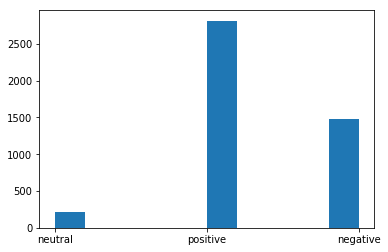

In [2]:
pp=sentiment.count('positive')
ne=sentiment.count('negative')
nu=sentiment.count('neutral')
print(pp,ne,nu)
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(sentiment)

In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import TweetTokenizer
                                                 
import re 
import pandas as pd
from textblob import TextBlob 
                                       
data = pd.read_csv("dtest1.csv")
                                                         
def get_tweet_sentiment(tweet):
    analysis = TextBlob(clean_tweet(tweet))     
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0: 
        return 'neutral'
    else: 
        return 'negative'
                                           
def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", tweet).split())         
                                
sentiment=[]
                                                                  
df=["movie is good but script was evry  total all charcters are bad"]
                                                                                                   
for i in df:               
    senti=get_tweet_sentiment(i)    
    sentiment.append(senti) 
print(sentiment)

['positive']


In [7]:
data = pd.read_csv("dtest1.csv")
data

,uniqueID,drugName,condition,review,rating,date,usefulCount,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22,NaN,NaN,NaN,NaN
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17,NaN,NaN,NaN,NaN
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3,NaN,NaN,NaN,NaN
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35,NaN,NaN,NaN,NaN
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4,NaN,NaN,NaN,NaN
5,208087,Zyclara,Keratosis,"""4 days in on first 2 weeks. Using on arms an...",4,3-Jul-14,13,NaN,NaN,NaN,NaN
6,215892,Copper,Birth Control,"""I&#039;ve had the copper coil for about 3 mon...",6,6-Jun-16,1,NaN,NaN,NaN,NaN
7,169852,Amitriptyline,Migraine Prevention,"""This has been great for me. I&#039;ve been on...",9,21-Apr-09,32,NaN,NaN,NaN,NaN
8,23295,Methadone,Opiate Withdrawal,"""Ive been on Methadone for over ten years and ...",7,18-Oct-16,21,NaN,NaN,NaN,NaN
9,71428,Levora,Birth Control,"""I was on this pill for almost two years. It d...",2,16-Apr-11,3,NaN,NaN,NaN,NaN


5       positive
1993    negative
Name: sentiment, dtype: object
0 1 1


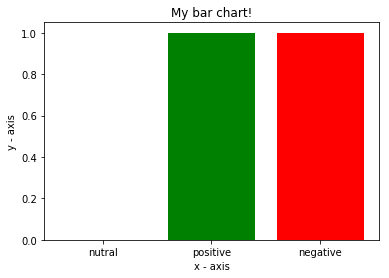

In [10]:
data1=data.loc[data['drugName'] == 'Zyclara']
df=data1["sentiment"]
print(df)
n=df.values.tolist()
height=[]
nu=n.count('neutral')
height.append(nu)
pp=n.count('positive')
height.append(pp)
ne=n.count('negative')
height.append(ne)
print(nu,pp,ne)

import matplotlib.pyplot as plt 
  
left = [1,2,3]  

 
tick_label = ['nutral', 'positive', 'negative'] 
plt.bar(left, height, tick_label = tick_label, color = ['red', 'green']) 
plt.xlabel('x - axis') 
plt.ylabel('y - axis') 
plt.title('My bar chart!') 
plt.show() 


LookupError: 
**********************************************************************
  Resource [93mwordnet[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('wordnet')
  [0m
  Attempted to load [93mcorpora/wordnet[0m

  Searched in:
    - 'C:\\Users\\Kushal/nltk_data'
    - 'C:\\Users\\Kushal\\Anaconda3\\nltk_data'
    - 'C:\\Users\\Kushal\\Anaconda3\\share\\nltk_data'
    - 'C:\\Users\\Kushal\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\Kushal\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [17]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import TweetTokenizer
                                                 
import re 
import pandas as pd
from textblob import TextBlob 
                                       
data = pd.read_csv("dtest1.csv")
                                                         
def get_tweet_sentiment(tweet):
    analysis = TextBlob(clean_tweet(tweet))
    print(analysis.sentiment.polarity )
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0: 
        return 'neutral'
    else: 
        return 'negative'
                                           
def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", tweet).split())         
                                
sentiment=[]
                                                                  
df=["movie is good ","i am not well","this is bad tweet"]
                                                                                                   
for i in df:               
    senti=get_tweet_sentiment(i)    
    sentiment.append(senti) 
print(sentiment)

0.7
0.0
-0.6999999999999998
['positive', 'neutral', 'negative']
